In [335]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt #for showing plots
import seaborn as sns #for plotting
import statsmodels.api as sm
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats as stats
from scipy.stats.distributions import norm
import random
import math
import collections
import re


# Insights into the dataset

In [359]:
df = pd.read_csv(r'D:\User\Courses\Wanted Hackathon\Dataset-DATARQ-3380.csv')

print(df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19967 entries, 0 to 19966
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                19967 non-null  int64  
 1   country                19967 non-null  object 
 2   gender                 19967 non-null  object 
 3   years_of_experience    19967 non-null  int64  
 4   no_of_apply            19967 non-null  int64  
 5   no_of_pass             19967 non-null  int64  
 6   no_of_hire             19967 non-null  int64  
 7   avg_apply_pass         19967 non-null  float64
 8   avg_pass_hire          19967 non-null  float64
 9   no_of_event_reg        19967 non-null  int64  
 10  signup_year            19967 non-null  int64  
 11  current_inactive_days  19952 non-null  float64
 12  education_level        19967 non-null  object 
 13  job_role               19967 non-null  object 
 14  skills                 19967 non-null  object 
dtypes:

At first glance, the dataset contain mainly details on user's occupation, as we can see that most of the columns are relating to job related informations e.g. years_of_experience, education_level, job_role, skills

# Data cleaning

a quick conditional formating using excel shows there's total of 1782 duplicate user_id entries.
* all of the duplicates are in doubles
* there are difference between some of the duplicates for columns:
    * country
    * gender
    * avg_apply_pass
    * current_inactive_days

given there are difference in some of the duplicated rows, we do not know which rows contain the accurate infomation, so to be accurate in our analysis, lets remove all the duplicates and null data

In [209]:
# we have 15rows of null values
df.isnull().sum().sum()

15

In [360]:
new_df = df.drop_duplicates(subset=['user_id'], keep=False).dropna()
new_df = new_df.reset_index(drop=True)
print(new_df.info())

#1782+15 = 1797
#19967 - 18170 = 1797 tally


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18170 entries, 0 to 18169
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                18170 non-null  int64  
 1   country                18170 non-null  object 
 2   gender                 18170 non-null  object 
 3   years_of_experience    18170 non-null  int64  
 4   no_of_apply            18170 non-null  int64  
 5   no_of_pass             18170 non-null  int64  
 6   no_of_hire             18170 non-null  int64  
 7   avg_apply_pass         18170 non-null  float64
 8   avg_pass_hire          18170 non-null  float64
 9   no_of_event_reg        18170 non-null  int64  
 10  signup_year            18170 non-null  int64  
 11  current_inactive_days  18170 non-null  float64
 12  education_level        18170 non-null  object 
 13  job_role               18170 non-null  object 
 14  skills                 18170 non-null  object 
dtypes:

With the duplicates removed, and nulls values removed, we proceed to do level 1 analysis

In [353]:
print('top 10 countries', '\n', new_df['country'].value_counts(normalize=True).nlargest(10).mul(100).round(1).astype(str) + '%', '\n')

print('proportion of genders','\n', new_df['gender'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%', '\n')

print('years_of_experience','\n', new_df['years_of_experience'].describe(), '\n')

print('no_of_apply', '\n', new_df['no_of_apply'].describe(), '\n')

print('no_of_hire', '\n', new_df['no_of_hire'].describe(), '\n')


print('signup rate each year', '\n', new_df['signup_year'].value_counts().sort_index(ascending=True), '\n')

print('inactive_days', '\n', new_df['current_inactive_days'].describe(), '\n')

print('proportion of education level','\n', new_df['education_level'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%', '\n')

print('top 10 job roles', '\n', new_df['job_role'].value_counts(normalize=True).nlargest(10).mul(100).round(1).astype(str) + '%', '\n')


top 10 countries 
 South Korea       93.1%
United States      3.2%
Japan              1.7%
United Kingdom     0.4%
Vietnam            0.3%
Hong Kong          0.3%
India              0.1%
Taiwan             0.1%
China              0.1%
Thailand           0.1%
Name: country, dtype: object 

proportion of genders 
 female    50.0%
male      50.0%
Name: gender, dtype: object 

years_of_experience 
 count    18170.000000
mean         2.621354
std          3.553147
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max        131.000000
Name: years_of_experience, dtype: float64 

no_of_apply 
 count    18170.000000
mean        30.265768
std         68.225869
min          0.000000
25%          4.000000
50%         13.000000
75%         32.000000
max       3133.000000
Name: no_of_apply, dtype: float64 

no_of_hire 
 count    18170.000000
mean         0.689653
std          0.489583
min          0.000000
25%          0.000000
50%          1.000000
75%        

years_of_experience 
 count    18170.000000
mean         2.621354
std          3.553147
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max        131.000000
Name: years_of_experience, dtype: float64 



Text(0.5, 1.0, 'statistical summary of years of experience')

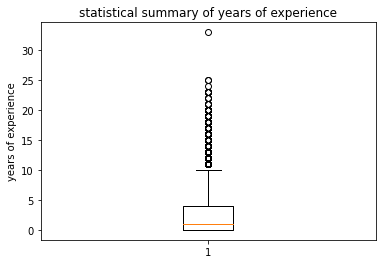

In [361]:
# graphing the 1st lvl analysis

print('years_of_experience','\n', new_df['years_of_experience'].describe(), '\n')

#drop the outlier 133 year of experience
yoe = new_df[new_df.years_of_experience != 131]

plt.boxplot(yoe['years_of_experience'])
#plt.xlabel('BMI Level')
plt.ylabel('years of experience')
plt.title('statistical summary of years of experience')

no_of_apply 
 count    18185.000000
mean        30.248392
std         68.200580
min          0.000000
25%          4.000000
50%         13.000000
75%         32.000000
max       3133.000000
Name: no_of_apply, dtype: float64 



Text(0.5, 1.0, 'statistical summary of applications made')

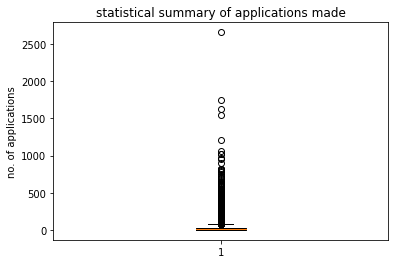

In [191]:
print('no_of_apply', '\n', new_df['no_of_apply'].describe(), '\n')

#drop the outlier 3133 applications
noa = new_df[new_df.no_of_apply != 3133]

plt.boxplot(noa['no_of_apply'])
#plt.xlabel('BMI Level')
plt.ylabel('no. of applications')
plt.title('statistical summary of applications made')

# print(np.log(13.000000))
# print(math.exp(2.5649493574615367))

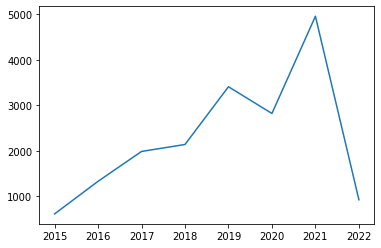

In [362]:
x = new_df['signup_year'].unique()
y = new_df['signup_year'].value_counts().sort_index(ascending=True)

plt.plot(x, y)

#can consider to drop 2022 data since incomplete data

In [365]:
# grouping the inactive periods by months and years

conditions = [
    (new_df['current_inactive_days'] <= 30),
    (new_df['current_inactive_days'] > 30) & (new_df['current_inactive_days'] <= 180),
    (new_df['current_inactive_days'] > 180) & (new_df['current_inactive_days'] <= 365),
    (new_df['current_inactive_days'] > 365)
    ]

values = ['<= a month', 'a month to half a year', 'half a year to a year', 'more than a year']

new_df['inactive_period'] = np.select(conditions, values)

print('inactive period of users')
new_df['inactive_period'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

inactive period of users


<= a month                56.0%
a month to half a year    29.1%
half a year to a year      7.8%
more than a year           7.1%
Name: inactive_period, dtype: object

# 2nd level analysis

In [242]:
#print(new_df['country'].value_counts(normalize=True).nlargest(10).mul(100).round(1))
topcountries = ['South Korea', 'United States', 'Japan', 'United Kingdom', 'Vietnam', 'Hong Kong', 'India', 'Taiwan', 'China', 'Thailand']

topcountry = new_df[new_df['country'].isin(topcountries)]['country']

new_df.groupby(topcountry)['gender'].value_counts().unstack().sort_values(by='female', ascending=False)

gender,female,male
country,,
South Korea,8492,8429
United States,267,310
Japan,160,157
United Kingdom,38,28
Vietnam,26,21
Hong Kong,24,22
Taiwan,16,8
India,10,16
China,8,11


In [233]:
new_df.groupby('gender')['education_level'].value_counts().unstack()

education_level,Graduated College,No College
gender,,
female,8044,1050
male,8095,981


In [243]:
new_df.groupby(topcountry)['education_level'].value_counts().unstack().sort_values(by='Graduated College', ascending=False)

education_level,Graduated College,No College
country,,
South Korea,15096,1825
United States,495,82
Japan,279,38
United Kingdom,51,15
Hong Kong,38,8
Vietnam,38,9
China,17,2
India,14,12
Taiwan,14,10


In [249]:
new_df.groupby(topcountry)['signup_year'].value_counts().unstack().sort_values(by=2015, ascending=False)

signup_year,2015,2016,2017,2018,2019,2020,2021,2022
country,,,,,,,,
South Korea,571.0,1235.0,1855.0,2020.0,3234.0,2644.0,4489.0,873.0
United States,17.0,42.0,60.0,64.0,104.0,134.0,140.0,16.0
Japan,6.0,10.0,16.0,11.0,11.0,2.0,242.0,19.0
United Kingdom,4.0,10.0,4.0,7.0,9.0,13.0,16.0,3.0
Vietnam,4.0,2.0,7.0,4.0,13.0,6.0,9.0,2.0
Thailand,2.0,3.0,2.0,2.0,2.0,1.0,4.0,2.0
China,1.0,5.0,7.0,6.0,NaN,NaN,NaN,NaN
Hong Kong,NaN,9.0,14.0,16.0,5.0,2.0,NaN,NaN
India,NaN,NaN,NaN,NaN,5.0,6.0,14.0,1.0


In [294]:
#print('years_of_experience','\n', new_df['years_of_experience'].describe(), '\n')

print('average years of experience by gender')
new_df.groupby('gender')['years_of_experience'].mean().round(2)

average years of experience by gender


gender
female    2.63
male      2.61
Name: years_of_experience, dtype: float64

In [282]:
print('average years of experience by country')
new_df.groupby(topcountry)['years_of_experience'].mean().sort_values(ascending=False).round(2)

average years of experience by country


country
Vietnam           4.06
United States     2.97
United Kingdom    2.97
Thailand          2.83
South Korea       2.63
Taiwan            2.46
Japan             2.05
India             1.69
Hong Kong         0.04
China             0.00
Name: years_of_experience, dtype: float64

In [293]:
#print('no_of_apply', '\n', new_df['no_of_apply'].describe(), '\n')

print('average application by gender')
new_df.groupby('gender')['no_of_apply'].mean().round(2)

average application by gender


gender
female    30.17
male      30.36
Name: no_of_apply, dtype: float64

In [354]:
print('average job applications by country')
new_df.groupby(topcountry)['no_of_apply'].mean().sort_values(ascending=False).round(1)

average job applications by country


country
United Kingdom    70.9
Taiwan            69.8
United States     47.2
China             41.2
Vietnam           31.3
South Korea       29.9
Hong Kong         29.2
Thailand          23.2
Japan              7.9
India              7.5
Name: no_of_apply, dtype: float64

In [263]:
new_df.groupby(topcountry)['no_of_apply', 'no_of_hire'].mean().sort_values(by='no_of_apply', ascending=False).round(1)

c:\Users\Kwang Hui Hang\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,no_of_apply,no_of_hire
country,,
United Kingdom,70.9,0.8
Taiwan,69.8,0.8
United States,47.2,0.9
China,41.2,0.9
Vietnam,31.3,0.7
South Korea,29.9,0.7
Hong Kong,29.2,0.9
Thailand,23.2,0.8
Japan,7.9,0.1


In [367]:
#print(new_df['job_role'].value_counts(normalize=True).nlargest(10).mul(100).round(1).astype(str) + '%', '\n')

topjobs = ['Web Developer', 'Web Designer', 'Strategic Planner', 'Front-end Engineer', 'Service Planner', 'Social Marketer', 'UX Designer', 'iOS Developer', 'Java Developer', 'Web Publisher']

topjob = new_df[new_df['job_role'].isin(topjobs)]['job_role']

print('proportion of gender in top 10 job')
new_df.groupby(topjob)['gender'].value_counts(normalize=True).mul(100).round(1).unstack().sort_values(by='female', ascending=False).astype(str) + '%'

proportion of gender in top 10 job


gender,female,male
job_role,,
Web Designer,52.4%,47.6%
Java Developer,51.7%,48.3%
Front-end Engineer,50.3%,49.7%
Strategic Planner,50.0%,50.0%
Web Developer,49.6%,50.4%
iOS Developer,49.3%,50.7%
UX Designer,49.2%,50.8%
Service Planner,47.5%,52.5%
Web Publisher,47.2%,52.8%


In [368]:
print('average years of experience by job role')
new_df.groupby(topjob)['years_of_experience'].mean().sort_values(ascending=False).round(2)

average years of experience by job role


job_role
Strategic Planner     3.94
Service Planner       3.65
Social Marketer       2.82
Web Designer          2.76
iOS Developer         2.71
Java Developer        2.52
Web Publisher         2.28
Web Developer         2.18
UX Designer           2.01
Front-end Engineer    0.83
Name: years_of_experience, dtype: float64

In [334]:
# extracting the skills from the top 10 job

#topjobs = ['Web Developer', 'Web Designer', 'Strategic Planner', 'Front-end Engineer', 'Service Planner', 'Social Marketer', 'UX Designer', 'iOS Developer', 'Java Developer', 'Web Publisher']

topjobroles = new_df[new_df['job_role'].isin(topjobs)]
role_skills = topjobroles.loc[:, ('job_role', 'skills')]

role_skills_tuple = list(role_skills.itertuples(index=False, name=None))

#print(role_skills_tuple[1][0]) #Social Marketer
#print(role_skills_tuple[1][1]) #CRM|Growth Hacking
#print(topjobs[0]) #Web Developer

WebDeveloper_skills = []
WebDesigner_skills = []
StrategicPlanner_skills = []
Frontend_Engineer_skills = []
ServicePlanner_skills = []
SocialMarketer_skills = []
UXDesigner_skills = []
iOSDeveloper_skills = []
JavaDeveloper_skills = []
WebPublisher_skills = []


for i in role_skills_tuple:
    if i[0] in topjobs[0]:
        x = i[1].split('|')
        for y in x:
            WebDeveloper_skills.append(y)
    if i[0] in topjobs[1]:
        x = i[1].split('|')
        for y in x:
            WebDesigner_skills.append(y)
    if i[0] in topjobs[2]:
        x = i[1].split('|')
        for y in x:
            StrategicPlanner_skills.append(y)
    if i[0] in topjobs[3]:
        x = i[1].split('|')
        for y in x:
            Frontend_Engineer_skills.append(y)
    if i[0] in topjobs[4]:
        x = i[1].split('|')
        for y in x:
            ServicePlanner_skills.append(y)
    if i[0] in topjobs[5]:
        x = i[1].split('|')
        for y in x:
            SocialMarketer_skills.append(y)
    if i[0] in topjobs[6]:
        x = i[1].split('|')
        for y in x:
            UXDesigner_skills.append(y)
    if i[0] in topjobs[7]:
        x = i[1].split('|')
        for y in x:
            iOSDeveloper_skills.append(y)
    if i[0] in topjobs[8]:
        x = i[1].split('|')
        for y in x:
            JavaDeveloper_skills.append(y)
    if i[0] in topjobs[9]:
        x = i[1].split('|')
        for y in x:
            WebPublisher_skills.append(y)

print(len(WebDeveloper_skills)) #18291
print(len(WebDesigner_skills)) #4403 
print(len(StrategicPlanner_skills)) #3632
print(len(Frontend_Engineer_skills)) #5645
print(len(ServicePlanner_skills)) #3687
print(len(SocialMarketer_skills)) #2038
print(len(UXDesigner_skills)) #2714
print(len(iOSDeveloper_skills)) #4193
print(len(JavaDeveloper_skills)) #3309
print(len(WebPublisher_skills)) #2303



18291
4403
3632
5645
5645
3687
2038
2714
4193
3309
2303


In [349]:
# counting the top 10 of skills from each role

WebDeveloper_topskills = collections.Counter(WebDeveloper_skills).most_common(10)

print('WebDeveloper_topskills', '\n', WebDeveloper_topskills)

WebDesigner_topskills = collections.Counter(WebDesigner_skills).most_common(10)

print('WebDesigner_topskills', '\n', WebDesigner_topskills)

StrategicPlanner_topskills = collections.Counter(StrategicPlanner_skills).most_common(10)

print('StrategicPlanner_topskills', '\n', StrategicPlanner_topskills)

Frontend_Engineer_topskills = collections.Counter(Frontend_Engineer_skills).most_common(10)

print('Frontend_Engineer_topskills', '\n', Frontend_Engineer_topskills)

ServicePlanner_topskills = collections.Counter(ServicePlanner_skills).most_common(10)

print('ServicePlanner_topskills', '\n', ServicePlanner_topskills)

SocialMarketer_topskills = collections.Counter(SocialMarketer_skills).most_common(10)

print('SocialMarketer_topskills', '\n', SocialMarketer_topskills)

UXDesigner_topskills = collections.Counter(UXDesigner_skills).most_common(10)

print('UXDesigner_topskills', '\n', UXDesigner_topskills)

iOSDeveloper_topskills = collections.Counter(iOSDeveloper_skills).most_common(10)

print('iOSDeveloper_topskills', '\n', iOSDeveloper_topskills)

JavaDeveloper_topskills = collections.Counter(JavaDeveloper_skills).most_common(10)

print('JavaDeveloper_topskills', '\n', JavaDeveloper_topskills)

WebPublisher_topskills = collections.Counter(WebPublisher_skills).most_common(10)

print('WebPublisher_topskills', '\n', WebPublisher_topskills)


WebDeveloper_topskills 
 [('AWS', 1967), ('Git', 757), ('Java', 672), ('MySQL', 616), ('Python', 580), ('JavaScript', 558), ('Docker', 520), ('React', 481), ('TypeScript', 457), ('GitHub', 419)]
WebDesigner_topskills 
 [('Adobe Illustrator', 733), ('Adobe Photoshop', 704), ('UI Design', 237), ('Graphic Design', 207), ('Figma', 170), ('Sketch', 164), ('3D', 160), ('Branding', 150), ('Web Design', 141), ('Adobe XD', 117)]
StrategicPlanner_topskills 
 [('AWS', 124), ('Accounting', 112), ('JIRA', 104), ('SQL', 103), ('Excel', 95), ('Google Analytics', 92), ('Tableau', 65), ('Python', 58), ('Axure', 54), ('IFRS', 52)]
Frontend_Engineer_topskills 
 [('AWS', 611), ('Git', 253), ('React', 203), ('JavaScript', 186), ('TypeScript', 185), ('Docker', 181), ('Python', 178), ('MySQL', 167), ('Java', 152), ('APIs', 129)]
ServicePlanner_topskills 
 [('AWS', 133), ('Accounting', 85), ('JIRA', 77), ('Excel', 77), ('Adobe Photoshop', 73), ('SQL', 70), ('MySQL', 69), ('Google Analytics', 65), ('Java', 64)